# Probability

Dependent: Two events E and F are dependent if knowing something about whether E happens gives us information about whether F happens (and vice versa).

    
When two events are independent, than the probability that they both happen is the product of probabilities that each one happen.
```
P(E, F) = P(E)P(F)
```
## Conditional Probability

If they are not necessarily independent (and if the probability of F is not zero), then we define the probability of E conditional on F as:
```    
P(E|F) = P(E,F)/P(F)
```

It is read as probability of E, given that F happens.

We can rewrite it as:

```
P(E,F) = P(E|F)P(F)
```

Example: a family with two unknown children.
    
Assumption
- each child is likely to be a girl or boy
- the gender of the second child is independent of the gender of the first child


For _independent probability_, we can have four possible combinations:
```
BB, GG, BG, GB

No girls: 1/4
One boy, one girl: 1/2
Two girls: 1/ 4
```
http://adit.io/posts/2017-12-05-A-Mind-Boggling-Probability-Problem.html

Dependent probability: What is the probability that both children are girls on the event that at least one of the children is a girl? For dependent probability, we did not take into account that both of the children is a boy. So there's only 1 out three possibilities that both of them can be a girl.
    
    (-BB-), GG, BG, GB

    The answer is 1/3

In [10]:
import random

def random_kid():
    return random.choice(['boy', 'girl'])

both_girls = 0
older_girls = 0
either_girls = 0

random.seed(0)
for _ in range(1000):
    younger = random_kid()
    older = random_kid()
    if older == 'girl':
        older_girls += 1
    if older == 'girl' and younger == 'girl':
        both_girls += 1
    if older == 'girl' or younger == 'girl':
        either_girls += 1

print('P(both | older):', both_girls / older_girls) # ~1/2
print('P(both | either):', both_girls / either_girls) # ~1/3

P(both | older): 0.4949290060851927
P(both | either): 0.32232496697490093


## Continuous Distributions

In [13]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

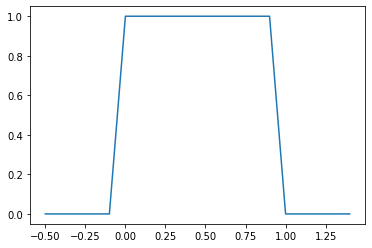

In [41]:
from matplotlib import pyplot as plt

X = [i * 0.1 for i in range(-5, 15)]
y = [uniform_pdf(x) for x in X]
plt.plot(X, y)

In [42]:
# CDF is the cumulative distribution function, which gives the probability that a random variable is less than
# or equal to a certain value.
def uniform_cdf(x):
    """Returns the probability that a uniform random variable is <= x"""
    if x < 0: return 0 # Uniform random is never less than 0.
    elif x < 1: return x # e.g. P(X <= 0.4) = 0.4
    else: return 1 # Uniform random is always less than 1.

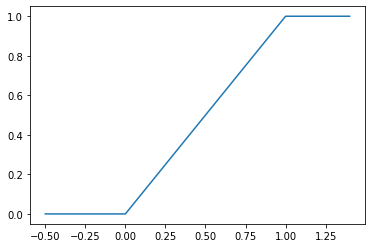

In [43]:
plt.plot(X, [uniform_cdf(x) for x in X])

In [46]:
import math
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

Text(0.5, 1.0, 'various normal pdfs')

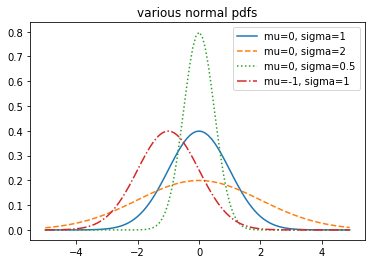

In [47]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1') # The standard normal distribution.
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title('Various normal pdfs')

In [48]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

Text(0.5, 1.0, 'Various normal cdfs')

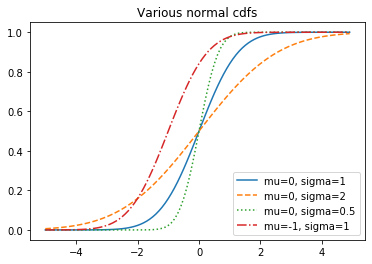

In [53]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc=4) # Bottom right.
plt.title('Various normal cdfs')

In [54]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.0001):
    """find approximate inverse using binary search"""
    # If not standard, compute standard and rescale.
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    lo_z, lo_p = -10.0, 0 # normal_cdf(-10) is (very close) to 0
    hi_z, hi_p = 10.0, 1 # normal_cdf(10) is (very close) to 1
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # Consider the midpoint.
        mid_p = normal_cdf(mid_z) 
        if mid_p < p:
            # Midpoint is still too low, search above it.
            lo_z, lo_p = mid_z, mid_p
        elif mid_p > p:
            # Midpoint is still too high, search below it.
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z

## The central limit theorem

In [61]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

In [65]:
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [70]:
from collections import Counter
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    
    # Use a bar chart to show the actual binomial samples.
    histogram = Counter(data)
    plt.bar(histogram.keys(),
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # Use a line chart to show the normal approximation.
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title('Binomial Distribution vs. Normal Approximation')

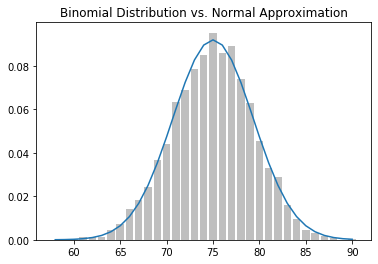

In [71]:
make_hist(0.75, 100, 10000)